Convert electron photon dataset from h5py files to single npz file with train test splitted

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils.random import sample_without_replacement

In [3]:
def load_dataset():
    with h5py.File("../datasets/raw/ep/photon.hdf5", "r") as f:
        px = np.asarray(f['X'][()], dtype=np.float32)
        py = np.asarray(f['y'][()], dtype=np.float32)
        print("Loaded photon dataset!")

    with h5py.File("../datasets/raw/ep/electron.hdf5", "r") as f:
        ex = np.asarray(f['X'][()], dtype=np.float32)
        ey = np.asarray(f['y'][()], dtype=np.float32)
        print("Loaded electron dataset!")

    print("Photon dataset shape:", px.shape, py.shape)
    print("Electron dataset shape:", ex.shape, ey.shape)
    return px,py,ex,ey

In [10]:
px,py,ex,ey = load_dataset()
print(px.shape, py.shape)
print(ex.shape, ey.shape)

tcmalloc: large alloc 2039808000 bytes == 0x82e14000 @  0x7f3ff4402680 0x7f3ff44222ec 0x7f3fe8ca3fae 0x7f3fe8ca488e 0x7f3fe8d02d87 0x7f3fe8d048da 0x7f3f4536bcf9 0x7f3f45367568 0x505166 0x56bbfa 0x569dba 0x4eb54f 0x7f3f47f03aac 0x7f3f47f0c6ba 0x5f74f6 0x50c358 0x5fe736 0x59eb75 0x5139cc 0x56bf28 0x5f6cd6 0x56bacd 0x569dba 0x6902a7 0x6023c4 0x5c6730 0x56bacd 0x501488 0x56d4d6 0x501488 0x56d4d6


Loaded photon dataset!


tcmalloc: large alloc 2039808000 bytes == 0x132176000 @  0x7f3ff4402680 0x7f3ff44222ec 0x7f3fe8ca3fae 0x7f3fe8ca488e 0x7f3fe8d02d87 0x7f3fe8d048da 0x7f3f4536bcf9 0x7f3f45367568 0x505166 0x56bbfa 0x569dba 0x4eb54f 0x7f3f47f03aac 0x7f3f47f0c6ba 0x5f74f6 0x50c358 0x5fe736 0x59eb75 0x5139cc 0x56bf28 0x5f6cd6 0x56bacd 0x569dba 0x6902a7 0x6023c4 0x5c6730 0x56bacd 0x501488 0x56d4d6 0x501488 0x56d4d6


Loaded electron dataset!
Photon dataset shape: (249000, 32, 32, 2) (249000,)
Electron dataset shape: (249000, 32, 32, 2) (249000,)
(249000, 32, 32, 2) (249000,)
(249000, 32, 32, 2) (249000,)


In [11]:
print(py.max(), py.min())
print(ey.max(), ey.min())

0.0 0.0
1.0 1.0


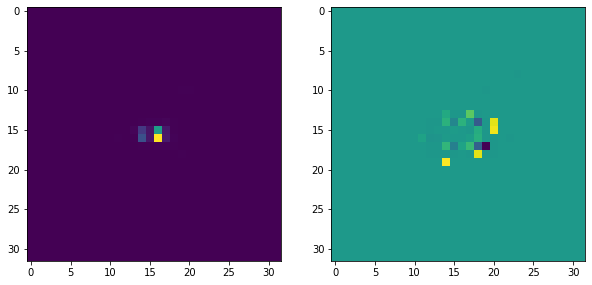

In [12]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(px[0,:,:,i])

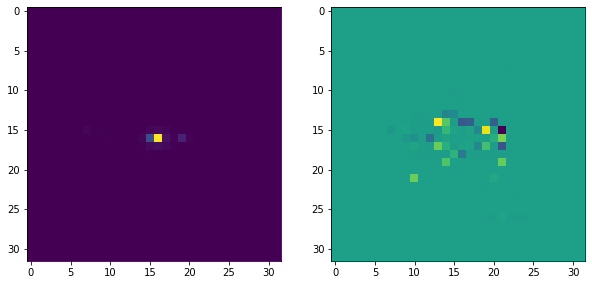

In [13]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(ex[0,:,:,i])

In [ ]:
x = np.concatenate((px,ex), axis =0)
y = np.concatenate((py,ey), axis= 0)
del px,ex,py,ey
print(x.shape)
print(y.shape)

(498000, 32, 32, 2)
(498000,)


In [ ]:
x, y = shuffle(x,y)

In [ ]:
print(x.max(),x.min())
print(y.max(),y.min())

2.2779698 -2.512557
1.0 0.0


In [ ]:
x.nbytes/(1024**2) + y.nbytes/(1024**2)

3892.5247192382812

In [ ]:
def reduce_memory_usage(x, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = x.nbytes/(1024**2)

    dtype = str(x.dtype)
    if dtype in numerics:
        c_min = x.min()
        c_max = x.max()

        if dtype[:3] == 'int':
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                x = x.astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                x = x.astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                x = x.astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                x = x.astype(np.int64)
        else:
            if (
                c_min > np.finfo(np.float16).min
                and c_max < np.finfo(np.float16).max
            ):
                x = x.astype(np.float16)
            elif (
                c_min > np.finfo(np.float32).min
                and c_max < np.finfo(np.float32).max
            ):
                x = x.astype(np.float32)
            else:
                x = x.astype(np.float64)
    end_mem = x.nbytes/(1024**2)
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return x

In [ ]:
x = reduce_memory_usage(x)

Mem. usage decreased to 1945.31 Mb (50.0% reduction)


In [ ]:
y = reduce_memory_usage(y)

Mem. usage decreased to 0.95 Mb (50.0% reduction)


In [ ]:
print(x.shape)
print(y.shape)
x.nbytes/(1024**2) + y.nbytes/(1024**2)

(498000, 32, 32, 2)
(498000,)


1946.2623596191406

In [ ]:
print(x.max(),x.min())
print(y.max(),y.min())

2.277 -2.512
1.0 0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state=42, stratify=y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
del x, y

(423300, 32, 32, 2) (423300,)
(74700, 32, 32, 2) (74700,)


In [ ]:
np.savez_compressed('/content/electron-photon-large.npz', **{
    'x_train': x_train,
    'y_train':y_train,
    'x_test':x_test,
    'y_test':y_test
})

In [ ]:
del x_train, x_test, y_train, y_test

In [ ]:
data = np.load('/content/electron-photon-large.npz', allow_pickle=True)

Download the dataset from sidebar

In [ ]:
data['x_train'].shape

(423300, 32, 32, 2)

Preprocess electron photon

In [27]:
px,py,ex,ey = load_dataset()

Loaded photon dataset!
Loaded electron dataset!
Photon dataset shape: (249000, 32, 32, 2) (249000,)
Electron dataset shape: (249000, 32, 32, 2) (249000,)


In [6]:
def check_borders(x):
    # finding the left-most non-zero pixel coordinate 
    for i in range(x.shape[2]):
        if (x[:, :, i, 0].max() != 1) or (x[:, :, i, 1].max() != 0):
            border_left = i
            break

    # finding the right-most non-zero pixel coordinate 
    for i in range(x.shape[2]):
        if (x[:, :, x.shape[2]-1-i,0].max() != 0) or (x[:, :, x.shape[2]-1-i,1].max() != 0):
            border_right = x.shape[2]-1-i
            break

    # finding the top-most non-zero pixel coordinate 
    for i in range(x.shape[1]):
        if (x[:, i, :,0].max() != 0) or (x[:, i, :,1].max() != 0):
            border_top = i
            break

    # finding the bottom-most non-zero pixel coordinate 
    for i in range(x.shape[1]):
        if (x[:, x.shape[1]-1-i, :,0].max() != 0) or (x[:, x.shape[1]-1-i, :,1].max() != 0):
            border_bottom = x.shape[1]-1-i
            break

    print(border_left, border_right)
    print(border_top, border_bottom)

In [7]:
check_borders(px)

0 31
0 31


In [8]:
check_borders(ex)

0 31
0 31


Both training and testing datasets have non-zero pixels near the image's very edges, making it impossible to crop the image without information loss.

In [28]:
n_samples = 60000
n_population = px.shape[0]

samples = sample_without_replacement(n_population, n_samples)
px_sampled = px[samples][:,:,:,0].reshape(-1,32,32,1)
del px

n_population = ex.shape[0]
samples = sample_without_replacement(n_population, n_samples)
ex_sampled = ex[samples][:,:,:,0].reshape(-1,32,32,1)
del ex

In [29]:
py = [0]*n_samples
ey = [1]*n_samples

In [30]:
x = np.concatenate((px_sampled,ex_sampled), axis =0)
y = np.concatenate((py,ey), axis= 0)
del px_sampled,ex_sampled,py,ey
print(x.shape)
print(y.shape)

(120000, 32, 32, 1)
(120000,)


In [31]:
x, y = shuffle(x,y)

In [32]:
print(x.max(),x.min())
print(y.max(),y.min())

1.4783498 0.0
1 0


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.16666, random_state=42,stratify=y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
# del x, y

(100000, 32, 32, 1) (100000,)
(20000, 32, 32, 1) (20000,)


In [39]:
np.savez_compressed('../datasets/downloaded/electron_photon_2.npz', **{
    'x_train': x_train,
    'y_train':y_train,
    'x_test':x_test,
    'y_test':y_test
})
del x_train, x_test, y_train, y_test

In [40]:
data = np.load('../datasets/downloaded/electron_photon_2.npz', allow_pickle=True)

In [41]:
data['x_train'].shape

(100000, 32, 32, 1)

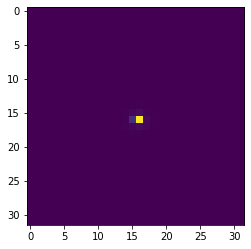

In [51]:
plt.imshow(data['x_train'][89][:,:,0])

In [43]:
data['x_train'].shape, data['x_test'].shape

((100000, 32, 32, 1), (20000, 32, 32, 1))

In [ ]:
p